# **Time Series Analysis: ADF Test for Stationarity**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("daily-total-female-births.csv", header=0, index_col=False)
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [14]:
df.index = pd.to_datetime(df['Date'])


In [15]:
df = df.drop(['Date'], axis=1)

In [17]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


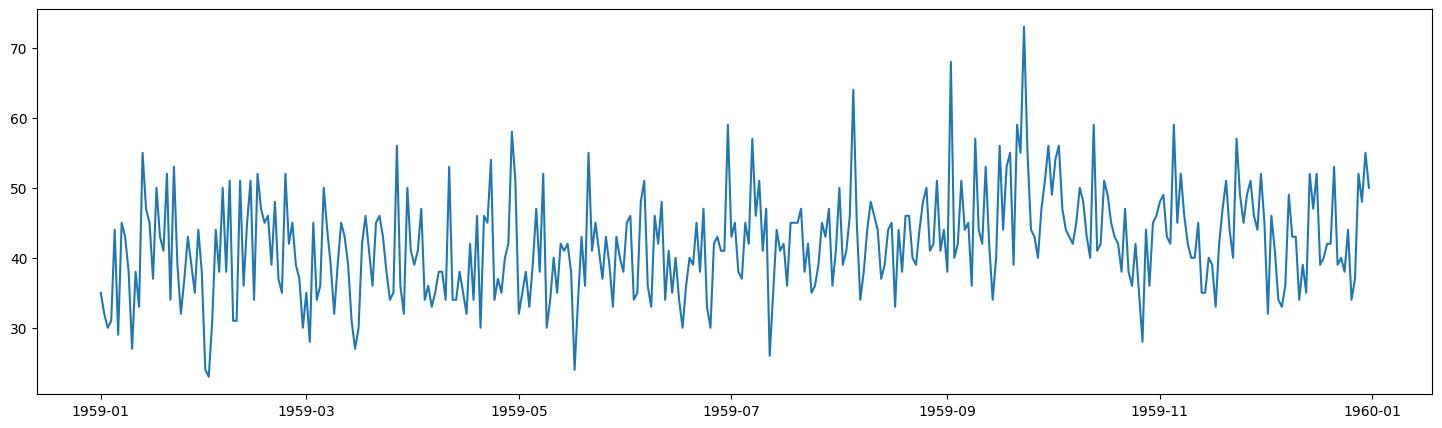

In [20]:
plt.figure(figsize=(18, 5))
plt.plot(df['Births'])

In [22]:
series = df.squeeze()

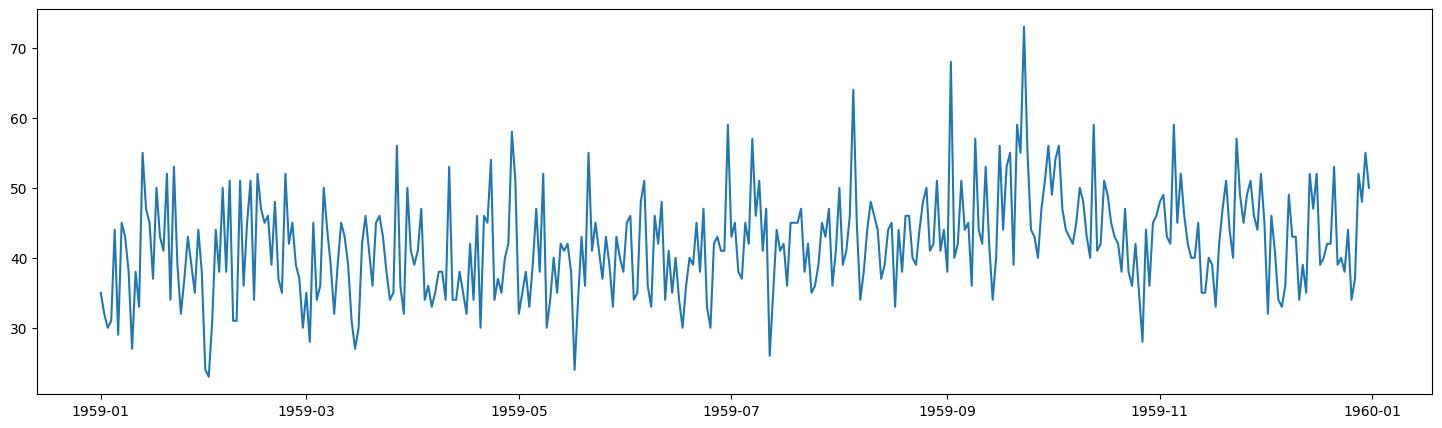

In [23]:
plt.figure(figsize=(18, 5))
plt.plot(series)

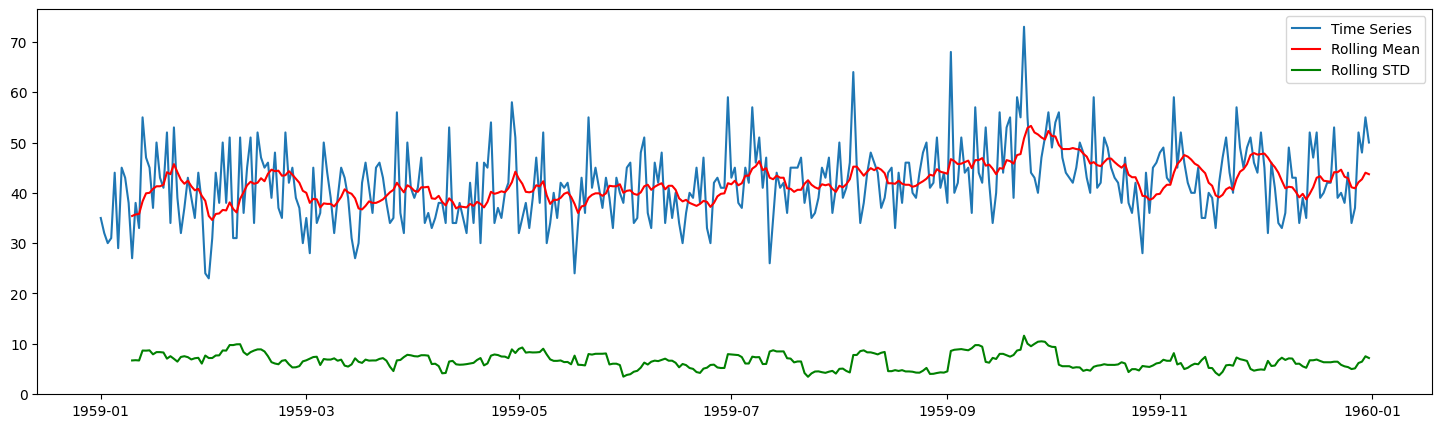

In [27]:
rolling_mean = series.rolling(window=10).mean()
rolling_sd = series.rolling(window=10).std()

plt.figure(figsize=(18, 5))
plt.plot(series, label='Time Series')
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_sd, color="green", label="Rolling STD")
plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adf_test = adfuller(series)
adf_test 

(np.float64(-4.808291253559765),
 np.float64(5.2434129901498554e-05),
 6,
 358,
 {'1%': np.float64(-3.448748905151901),
  '5%': np.float64(-2.8696473721448728),
  '10%': np.float64(-2.5710891239349585)},
 np.float64(2343.8290926464197))

In [32]:
for i in adf_test:
    print(i)

-4.808291253559765
5.2434129901498554e-05
6
358
{'1%': np.float64(-3.448748905151901), '5%': np.float64(-2.8696473721448728), '10%': np.float64(-2.5710891239349585)}
2343.8290926464197


In [39]:
if adf_test[1] < 0.05:
    print("Reject H0, The Model is Stationary")
else:
    print("Accept H0, The Model is non-stationary.")

Reject H0, The Model is Stationary


In [40]:
if adf_test[1] > 0.05:
    diff_series = series.diff().dropna()
    next_test = adfuller(diff_series)
    if next_test[1] < 0.05:
        print("Reject H0. Now the Series is Stationary.")
    else:
        print("Accept H0, Still Non-stationary")

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

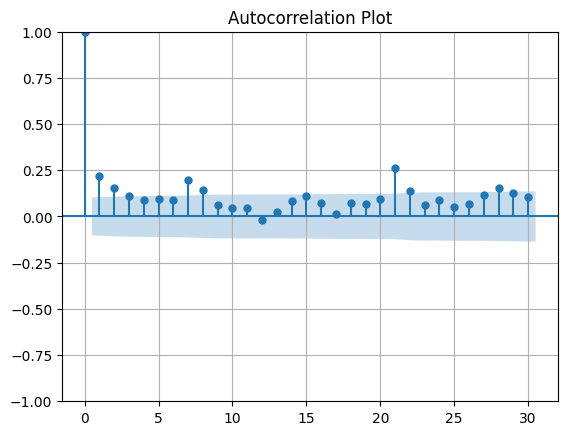

In [51]:
plot_acf(series, lags=30)
plt.title("Autocorrelation Plot")
plt.grid(True)
plt.show()

# Problem 2

In [53]:
data = pd.read_csv("AirPassengers.csv", header=0, index_col=False)
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [54]:
data.index = pd.to_datetime(data["date"])
data.head()

,date,value
date,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [55]:
data = data.drop(['date'], axis = 1)
data.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
series = data.squeeze()
series.head()

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: value, dtype: int64

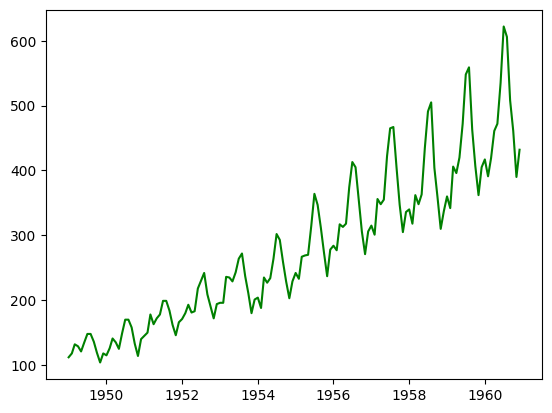

In [57]:
plt.plot(series, color="green")
plt.show()

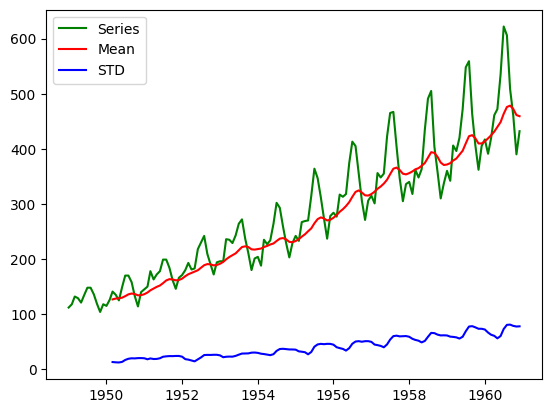

In [61]:
rolling_mean = series.rolling(window=15).mean()
rolling_std = series.rolling(window=15).std()

plt.plot(series, color="green", label="Series")
plt.plot(rolling_mean, color="red", label= "Mean")
plt.plot(rolling_std, color="blue", label="STD")
plt.legend()
plt.show()


In [62]:
test = adfuller(series)
if test[1] < 0.05:
    print("Reject H0, Model is Stationary")
else:
    print("Accept H0. Model is non-stationary")

Accept H0. Model is non-stationary


In [64]:
if test[1] > 0.05:
    diff_series = series.diff().dropna()
    test2 = adfuller(diff_series)

    if test2[1] < 0.05:
        print("Reject H0, Model is stationary.")
    else:
        print("Accept H0. Model is still non-stationary.")

Accept H0. Model is still non-stationary.


In [65]:
if test[1] > 0.05:
    diff_series = series.diff().dropna()
    test2 = adfuller(diff_series)

    if test2[1] < 0.05:
        print("Reject H0, Model is stationary.")
    else:
        print("Accept H0. Model is still non-stationary.")

Accept H0. Model is still non-stationary.


In [66]:
if test[1] > 0.05:
    diff_series = series.diff().dropna()
    test2 = adfuller(diff_series)

    if test2[1] < 0.05:
        print("Reject H0, Model is stationary.")
    else:
        print("Accept H0. Model is still non-stationary.")

Accept H0. Model is still non-stationary.


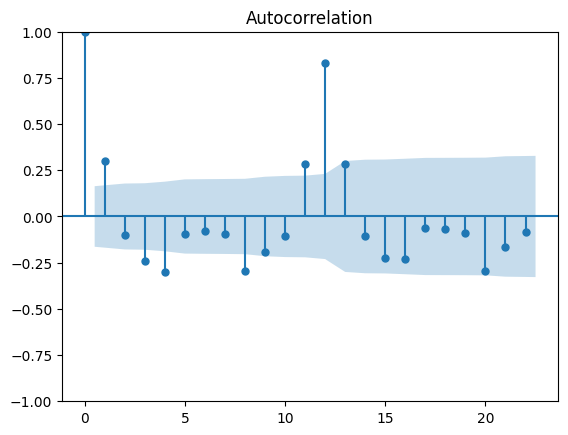

In [67]:
plot_acf(diff_series)
plt.show()